In [1]:
%%capture
from IPython.display import display, Math, Latex
%pylab inline

We test the Metropolis-Hastings algorithm. 
First, we will simply sample a 2D gaussian distribution:

\begin{equation}
\Pi(x)=(2\pi\vert A \vert )^{-1/2} e^{-\frac{1}{2} (x-\mu)^{T} A^{-1}(x-\mu)} \;,
\end{equation}

with A =  $\bigl(\begin{smallmatrix} 8&2 \\ 3&4 \end{smallmatrix} \bigr)$, and $\mu = \bigl(\begin{smallmatrix} 4 \\ -5 \end{smallmatrix} \bigr)$.

In the algorithm, we first sample using a symmetric proposal:

\begin{equation}
w(x_{i+1}\vert x_i)=(2\pi\vert B \vert )^{-1/2} e^{-\frac{1}{2} (x_{i+1}- x_i)^{T} B^{-1}(x_{i+1}- x_i)} \;,
\end{equation}

where B is random here.

We the follow the usual MH steps:

First we propose a first guess $x_0$: here it is random. Then we iterate:

 

- Draw a random vector u from the proposal: $\mathcal{G}(0,B)$ 

- set $x_{i+1} = x_{i} + u$

- calculate the acceptance rate: r = min$\left[ 1, \frac{\Pi(x_{i+1})}{\Pi(x_{i})} \frac{w(x_{i+1}\vert x_i)}{w(x_{i}\vert x_{i+1})} \right]$
- if r=1, we accept the jump
- if r$<$1, we generate a random uniform variable $a$. If a$\le$r, we accept, if a$>$r, we reject
- we go to next step






argument of the proposal =  [array([0, 0]), matrix([[ 1.26213156,  0.06176617],
        [ 1.52387292,  1.13046788]])] 
initial guess =  [ 12.03122025  39.72353554]


ploter_MH.py:38: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * n_sigma * np.sqrt(vals)
/Users/benjar/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


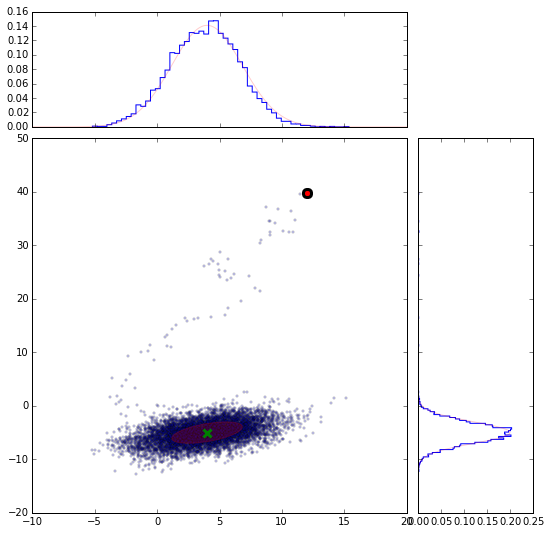

In [3]:
%run test_MH.py

The red dot is the initial guess, whereas the green cross is the real mean.

In light red we plot the theoretical $1\sigma$ contour of the gaussian, as well as the marginal distributions. 

In grey, we show, around the inital guess, the $1\sigma$ countour corresponding to the proposal. 

For now the gamma function case does not work. Need to understand what is $w(x_{i+1}\vert x_i)$ for the gamma distribution, maybe see: https://theclevermachine.wordpress.com/2012/10/20/mcmc-the-metropolis-hastings-sampler/

or file:///Users/benjar/Downloads/9781441915757-c1%20(1).pdf